# Quantitative Analysis of Price & Daily Returns
<ol>
<li>Can returns be described with normal distribution</li>
<li>Is there directional bias in daily  change</li>
<li>Can price movement be described as random walk?</li>
</ol>

### 1.  Set Up Environment

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns
sns.set()

In [17]:
import quandl

# Set your Quandl API key
quandl.ApiConfig.api_key = 'fLozqpfN3_WmBLTc4KRL'

# Fetch historical stock data for Apple (AAPL)
data = quandl.get('WIKI/AAPL')


In [18]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


### 2. Import Data

In [19]:
amzn = quandl.get('WIKI/AMZN')

### 3. Take a look at the data

In [20]:
amzn.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


### 4. Store instantaneous rate of return in separate series

In [35]:
amzn_adj_close = amzn['Adj. Close']
amzn_return = pd.DataFrame(round(np.log(amzn_adj_close).diff()*100,2))
amzn_return.head()

,Adj. Close
Date,
1997-05-16,NaN
1997-05-19,-1.21
1997-05-20,-4.34
1997-05-21,-13.62
1997-05-22,-2.24


<AxesSubplot:xlabel='Date'>

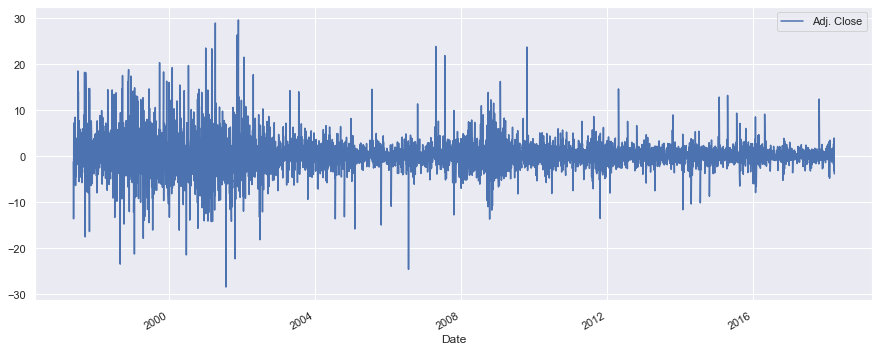

In [36]:
amzn_return.plot()

In [37]:
amzn_return.dropna(inplace=True)
amzn_return.describe()

,Adj. Close
count,5247.000000
mean,0.128959
std,3.789763
min,-28.460000
25%,-1.400000
50%,0.030000
75%,1.570000
max,29.620000


In [40]:
from scipy.stats import stats
n,minmax,mean,var,skew,kurt = stats.describe(amzn_return)
min, max = minmax
std = var**0.5

### For comparison, generate random numbers that follow normal distribution

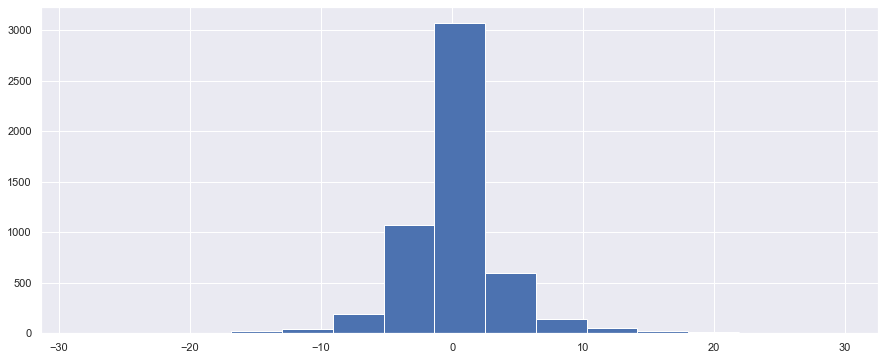

In [48]:
plt.hist(amzn_return, bins=15);

In [50]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

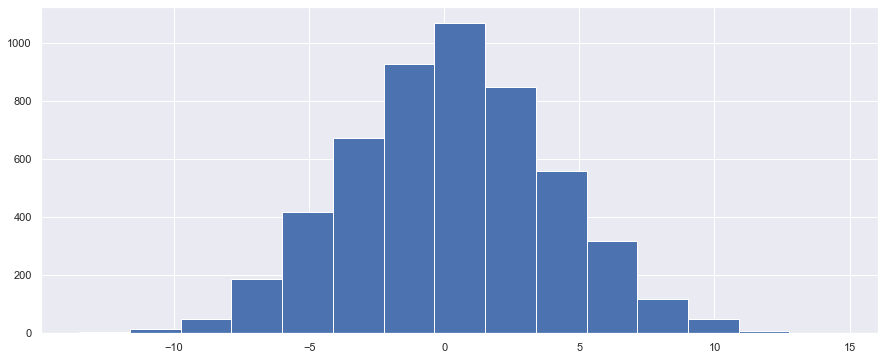

In [52]:
plt.hist(x, bins=15);

### Is the price normally distributed?

#### Use scipy stats to test the kurtosis, the null hypothesis is that the sample drawn form a population where the underlying kurtosis is that of a normally distributed variable

In [55]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)


In [57]:
print(x_test)

KurtosistestResult(statistic=-0.08140181026750615, pvalue=0.9351224095051749)


In [58]:
print(amzn_test)

KurtosistestResult(statistic=array([28.9001706]), pvalue=array([1.18804484e-183]))


Reject null hypothesis if the p-value is less than 0.05. In this case, we reject the null hypothesis

#### Plot histogram of price changes with normal curve overlay

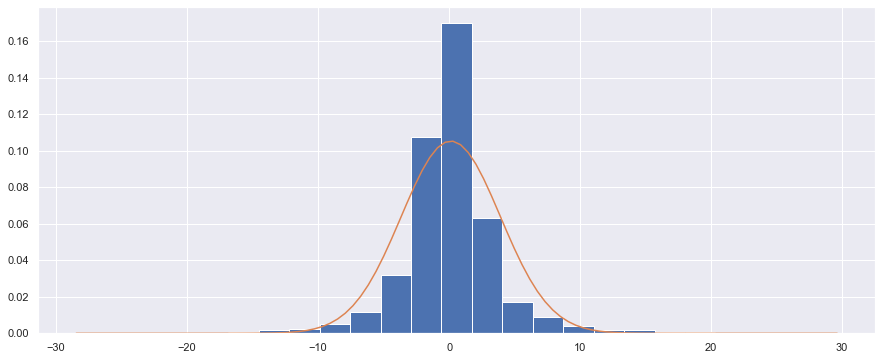

In [60]:
plt.hist(amzn_return, bins=25, edgecolor='w', density=True);
overlay = np.linspace(min, max, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));

### Is daily price change significantly different from zero?

#### Conduct simple hypothesis test

The null hypothesis is it has no directional bias

In [62]:
stats.ttest_1samp(amzn_return.sample(252), 0,alternative='two-sided')

Ttest_1sampResult(statistic=array([0.02857258]), pvalue=array([0.97722819]))

### Can the price movement be described as a random walk?

#### Create price lags

In [65]:
amzn_adj_close = pd.DataFrame(amzn_adj_close,columns=['Adj. Close'])
amzn_adj_close['lag_1'] = amzn_adj_close['Adj. Close'].shift(1)
amzn_adj_close['lag_2'] = amzn_adj_close['Adj. Close'].shift(2)
amzn_adj_close.dropna(inplace=True)
amzn_adj_close.head()

,Adj. Close,lag_1,lag_2
Date,,,
1997-05-20,1.635833,1.708333,1.729167
1997-05-21,1.427500,1.635833,1.708333
1997-05-22,1.395833,1.427500,1.635833
1997-05-23,1.500000,1.395833,1.427500
1997-05-27,1.583333,1.500000,1.395833
